In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Um básico sobre Python em estatística

Atualmente a linguagem de programação mais usada no mundo, principalmente pela combinação entre desempenho, facilidade de aprendizado e seu caráter open-source, o Python é uma ferramenta importante em análises estatísticas e aplicações científicas. 

Atualmente, utilizamos o Wolfram Mathematica no curso para realizar algumas tarefas principais, como:

1. Simular experimentos usando geradores de dados aleatórios, distribuídos conforme múltiplas funções densidade de probabilidade.
2. Calcular estatísticas simples dos sistemas, como média, variância, desvio padrão, etc.
3. Plotar histogramas. Plotar dados.
4. Fazer ajustes lineares e não-lineares de curvas.

Tentarei cobrir brevemente os tópicos listados acima.

## Geradores de números aleatórios via numpy

O módulo random do numpy `numpy.random` possui uma série de distribuições das quais podemos amostrar números aleatórios. Vou mostrar aqui as principais, mas a documentação pode ser encontrada neste [link](https://numpy.org/doc/1.16/reference/routines.random.html).

### Distribuição gaussiana

In [ ]:
#para fixar os numeros aleatorios, podemos usar uma seed na célula da simulação
np.random.seed(1)

#gerar 10 numeros gaussianos de media 0, variancia unitaria:
x_gaussian = np.random.normal(loc=0., scale=1., size=10)

#gerar uma grade de 10x10 numeros gaussianos de mesmos parametros que acima
x_gaussian_grid = np.random.normal(loc=0., scale=1., size=(5,10))

#Vamos ver os numeros gerados e as dimensões dos vetores:
print('Vetor unidimensional:\n', x_gaussian)
print()
print('Array 5x10:\n', x_gaussian_grid)
print()
print('Dimensão do vetor:',x_gaussian.shape)
print('Dimensão do array:',x_gaussian_grid.shape)

Vetor unidimensional:
 [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]

Array 5x10:
 [[ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944 -1.09989127
  -0.17242821 -0.87785842  0.04221375  0.58281521]
 [-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595 -0.68372786
  -0.12289023 -0.93576943 -0.26788808  0.53035547]
 [-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
  -1.11731035  0.2344157   1.65980218  0.74204416]
 [-0.19183555 -0.88762896 -0.74715829  1.6924546   0.05080775 -0.63699565
   0.19091548  2.10025514  0.12015895  0.61720311]
 [ 0.30017032 -0.35224985 -1.1425182  -0.34934272 -0.20889423  0.58662319
   0.83898341  0.93110208  0.28558733  0.88514116]]

Dimensão do vetor: (10,)
Dimensão do array: (5, 10)


### Distribuição exponencial

In [ ]:
np.random.seed(1)
#gerar um vetor de 10 numeros aleatorios distribuidos conforme uma exponencial
#de parametro 5
x_exponential = np.random.exponential(scale=5., size=10)
print('Vetor exponencial:\n', x_exponential)

Vetor exponencial:
 [2.69802919e+00 6.37062627e+00 5.71906793e-04 1.80006377e+00
 7.93547976e-01 4.84419358e-01 1.03057317e+00 2.11988241e+00
 2.52726271e+00 3.86979887e+00]


### Distribuição $\chi^2$

In [ ]:
np.random.seed(1)

#vetor de 10 numeros aleatorios distribuidos como chi quadrado com 3 graus de 
#liberdade
x_chisquared = np.random.chisquare(df=3, size=10)
print('Vetor chi quadrado:\n', x_chisquared)

Vetor chi quadrado:
 [7.89523814 1.24558467 1.36822429 0.69825022 8.49641899 1.04498082
 7.13137433 0.11274373 5.73945707 0.67255189]


### $t$ de Student

In [ ]:
np.random.seed(1)

#vetor de 10 numeros aleatorios distribuidos como t-Student com 3 graus de 
#liberdade
x_student = np.random.standard_t(df=3, size=10)
print('Vetor t-Student:\n', x_chisquared)

Vetor t-Student:
 [7.89523814 1.24558467 1.36822429 0.69825022 8.49641899 1.04498082
 7.13137433 0.11274373 5.73945707 0.67255189]


## Estatísticas básicas dos dados

Vamos usar a função `mean` do numpy para fazer médias e `var` para calcular o desvio padrão dos dados. Para isso, vamos usar nossos dados com distribuição gaussiana gerados anteriormente.

### Média

A média é obtida usando a função `mean`, onde temos a liberdade de escolher dentro de qual eixo desejamos realizar a média, para o caso de arrays bidimensionais.

In [ ]:
#ao tirarmos a media dos valores no vetor unidimensional, obtemos um numero
#como resposta:
print('Média vetor unidimensional:', np.mean(x_gaussian) )
print()
#no entanto, no vetor 5x10, temos algumas opções:

#tirar a média de todos os números no grid:
print('Média de todos os valores no grid:', np.mean(x_gaussian_grid) )
print()
#tirar as médias variando as linhas no grid:
print('Média variando linha no grid:\n', np.mean(x_gaussian_grid, axis=0) )
print()
#tirar as médias variando as colunas no grid:
print('Média variando coluna no grid:\n', np.mean(x_gaussian_grid, axis=1) )

Média vetor unidimensional: -0.09714089080609985

Média de todos os valores no grid: 0.029405380064324912

Média variando linha no grid:
 [-0.04436744 -0.51040987 -0.39953514  0.12326924  0.24105856 -0.36933124
 -0.07654598  0.29042901  0.36797482  0.67151182]

Média variando coluna no grid:
 [-0.16958838  0.08691254 -0.17857517  0.23081766  0.17746025]


### Variância

A variância usando `numpy.var` calcula a variância de máxima verossimilhança, ou seja, a estimativa tendenciosa desta. Escolhendo o parâmetro `ddof = 1` (delta degrees of freedom), que por default é 0, calcula-se a estimativa não tendenciosa. Para valores de `ddof` maiores que 1, calcula-se a variância como sendo `N - ddof`, onde `N` é o número de dados.

In [ ]:
print('Estimativa tendenciosa da variância:',np.var(x_gaussian))
print()
print('Estimativa não tendenciosa da variância:',np.var(x_gaussian,ddof=1))

Estimativa tendenciosa da variância: 1.4182393613078983

Estimativa não tendenciosa da variância: 1.5758215125643313


Também temos a liberdade de calcular a variância para diferentes eixos, assim como na média:

In [ ]:
print('Estimativa não tendenciosa da variância variando-se as linhas:\n', 
      np.var(x_gaussian_grid, axis=0))
print()
print('Estimativa não tendenciosa da variância variando-se as colunas:\n', 
      np.var(x_gaussian_grid, axis=1))

Estimativa não tendenciosa da variância variando-se as linhas:
 [0.78891551 1.06427189 0.49089535 0.80496745 0.46064361 0.34905348
 0.40085227 1.31150564 0.44949205 0.01627079]

Estimativa não tendenciosa da variância variando-se as colunas:
 [0.99828042 0.6034416  0.65631337 0.89658093 0.41502918]


### Desvio-padrão

O desvio-padrão possui a mesma propriedade da variância, de modo que o desvio padrão como raíz quadrada da variância não tendenciosa exige que `ddof=1`.

In [ ]:
print('Estimativa tendenciosa:',np.std(x_gaussian))
print()
print('Estimativa não tendenciosa:',np.std(x_gaussian,ddof=1))

Estimativa tendenciosa: 1.190898552063902

Estimativa não tendenciosa: 1.2553172955728489


## Plotando

A principal biblioteca para plots em python é o matplotlib, então focarei minha atenção nesta biblioteca.

### Scatter plot

O scatter plot é como o ListPlot do Wolfram Mathematica, usado para plotar pontos. Ele usa dois argumentos: um para x, outro para y, formando as coordenadas cartesianas de cada ponto.

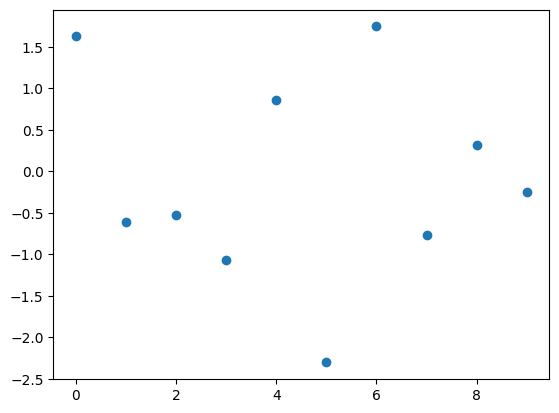

In [ ]:
#Plot dos dados exponenciais

#antes, precisamos criar um array de índices:
index = np.arange(0, len(x_exponential), 1)

plt.scatter(index, x_gaussian)

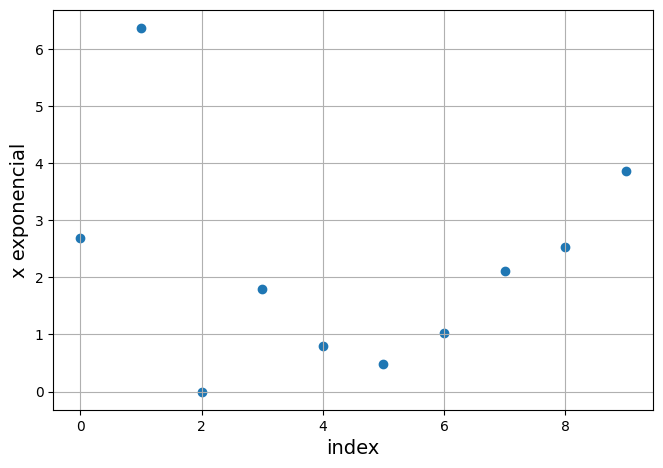

In [ ]:
#Para maior controle do plot, podemos mexer na estética dele:

#criamos uma imagem e um eixo:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

#assim, podemos plotar os pontos sobre a variável ax, usando o método scatter:
ax.scatter(index, x_exponential)

#adicionamos os nomes dos eixos com o tamanho da fonte:
ax.set_xlabel('index', fontsize=14)
ax.set_ylabel('x exponencial', fontsize=14)

#podemos adicionar um grid para facilitar a visualizacao:
ax.grid()

plt.show()

### Histogramas

O matplotlib também possibilita fazer histogramas dos dados, usando a função `hist`.

(array([  2.,   6.,  43., 130., 230., 287., 195.,  80.,  23.,   4.]),
 array([-3.92751407, -3.1955684 , -2.46362274, -1.73167707, -0.99973141,
        -0.26778575,  0.46415992,  1.19610558,  1.92805125,  2.65999691,
         3.39194257]),
 <BarContainer object of 10 artists>)

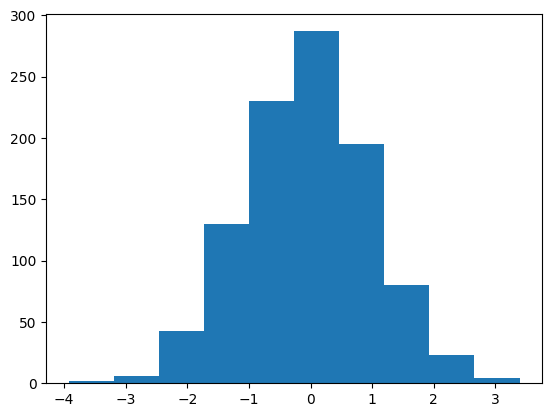

In [ ]:
#gerando um vetor com 1000 numeros aleatorios para histogramar:
x_hist = np.random.normal(loc=0, scale=1, size=1000)

plt.hist(x_hist)

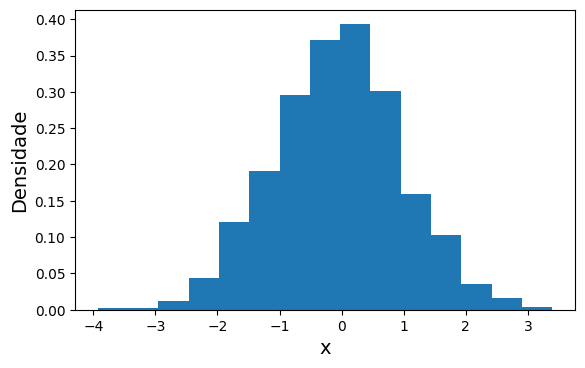

In [ ]:
#assim como no scatter plot, podemos mudar características do plot,
#inclusive transformá-lo numa densidade de probabilidade normalizando
#os bins:

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

#para 15 bins (canais), e normalizando-os
ax.hist(x_hist, bins=15, density=True)

#labels dos eixos
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)

plt.show()

### Plots

A função `plot` do matplotlib é semelhante ao scatter, porém ela conecta os pontos plotados. Assim, se tivermos muitos pontos formando uma curva, ela se assemelha a uma curva suave. O python não possui uma ferramenta que traduz uma expressão analítica num plot, como no Wolfram.

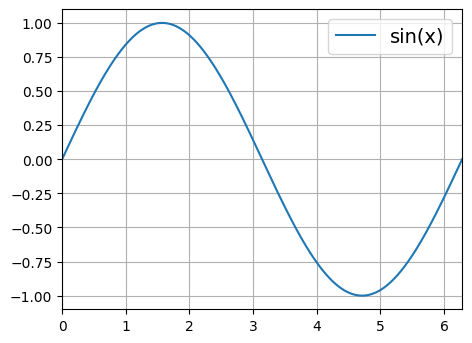

In [ ]:
#Exemplo de plot de uma função seno:

#array de 1000 pontos de x, divididos igualmente entre 0 e 2pi:
x = np.linspace(0, 2*np.pi, 1000)

#array dos valores de seno calculados:
y = np.sin(x)

#plot:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])

#plot com um label para usar na legenda:
ax.plot(x,y, label='sin(x)')

#ajustando os limites do plot
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.1, 1.1)

#usando o label acima para dar a legenda:
ax.legend(fontsize=14)
ax.grid()

plt.show()

## Funções de probabilidade via scipy

O scipy é outra biblioteca riquíssima em estatística, e o básico dela será apresentado aqui, começando com as distribuições de probabilidade. A lista de funções de probabilidade é imensa, ainda maior que o numpy, e pode ser encontrada neste [link](https://docs.scipy.org/doc/scipy/reference/stats.html).

No scipy, podemos usar a distribuição como um objeto, e chamar sobre o objeto métodos para retirar diferentes propriedades dele. Os exemplos deixarão mais claro:

### Um exemplo com a f.d.p. Normal

Vamos criar uma função normal de média zero e desvio padrão unitário e utilizar os métodos para obter as propriedades. Veremos aqui os seguintes métodos:

1. `rvs`: gera números aleatórios da distribuição, assim como fizemos com o numpy.

2. `pdf`: nos dá a função densidade de probabilidade.

3. `cdf`: nos dá a função cumulativa.

4. `stats`: nos dá as estatísticas básicas da função.

5. `fit`: esse método ajusta a distribuição em questão a um conjunto de dados fornecidos, usando como default o método da máxima verossimilhança.

Uma lista com todos os métodos para a função normal pode ser encontrada neste [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm).

In [ ]:
#criando um objeto que representa a distribuição normal padrão:
normal = scipy.stats.norm(loc=0, scale=1)

#gerando 10 números aleatórios a partir desta distribuição:
x_sp = normal.rvs(size=10)
print('Numeros aleatorios gerados:\n', x_sp)

Numeros aleatorios gerados:
 [-0.13622086 -1.40935205  1.04291118 -0.10519759 -1.16748238 -0.70737032
 -0.06632832 -1.13749575 -1.87719891  0.38016198]


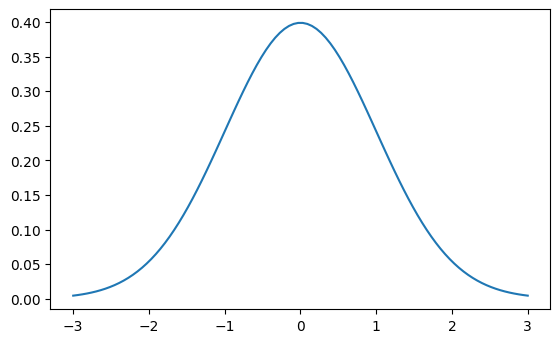

In [ ]:
#vamos obter a pdf e plotar:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

x = np.linspace(-3, 3, 100)
ax.plot(x, normal.pdf(x))

plt.show()

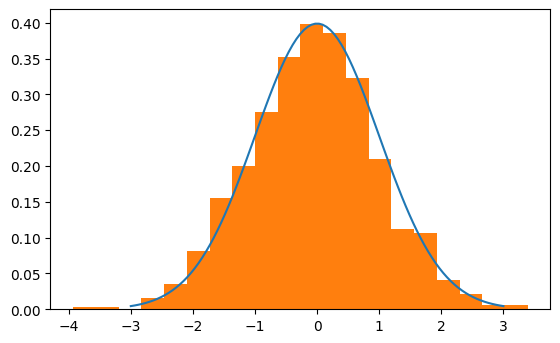

In [ ]:
#podemos inclusive sobrepor o histograma que fizemos anteriormente:

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

x = np.linspace(-3, 3, 100)
ax.plot(x, normal.pdf(x))
ax.hist(x_hist, bins=20, density=True)

plt.show()

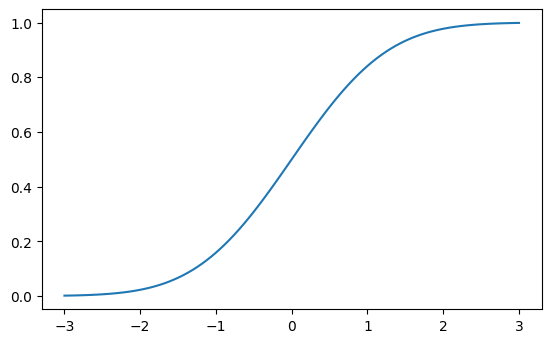

In [ ]:
# vamos plotar a função cumulativa:

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

x = np.linspace(-3, 3, 100)
ax.plot(x, normal.cdf(x))

plt.show()

media estimada: -0.02461928423934475
std estimado: 0.9910538332248929


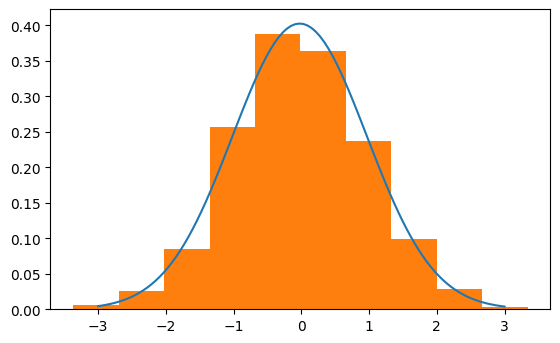

In [ ]:
# vamos agora gerar um conjunto de dados usando a normal do numpy
x_numpy = np.random.normal(loc=0, scale=1, size=1000)

# vamos agora ajustar uma normal a esses dados
media, std = scipy.stats.norm.fit(x_numpy)

print('media estimada:', media)
print('std estimado:', std)

# agora plotamos a distribuição e o histograma normalizado
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

x = np.linspace(-3, 3, 100)
ax.plot(x, scipy.stats.norm.pdf(x, loc=media,scale=std))
ax.hist(x_numpy, bins=10, density=True)

plt.show()


## Ajuste de curvas

O scipy também fornece diversos recursos para ajuste de curvas, sejam elas lineares ou não. O sub-módulo `optimize`, cuja documentação completa pode ser encontrada neste [link](https://docs.scipy.org/doc/scipy/reference/optimize.html) mostra alguns métodos de ajuste de funções.

### curve_fit

Talvez a função mais usada seja a curve_fit. Sua documentação pode ser encontrada neste [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Os principais parâmetros da função são:
1. `f`: a função a ser ajustada.
2. `xdata` e `ydata`: dados a serem ajustados.
3. `p0`: um chute inicial.
4. `sigma`: incerteza nos dados.

Vamos simular uma medida e ajustar um seno aos dados:

In [ ]:
np.random.seed(1)

#vetor com 40 pontos de x
x = np.linspace(0,5,40)

#vetor com 40 pontos-resposta em y, mais um ruido gaussiano
y = 1.5*np.exp(-2.33*x) + 0.2*np.random.normal(loc=0, scale=0.5, size=len(x))

#agora vamos definir a função a ser ajustada pelo curve_fit:
def teste(x, a, b):
  return a*np.exp(b*x)

#agora vamos usar o curve fit, retornando os parametros ajustados
#e matriz de covariancia dos parametros:

param, param_cov = scipy.optimize.curve_fit(f=teste,
                                            xdata=x,
                                            ydata=y)

print('Parametros ajustados:', param)
print()
print('Matriz covariancia:\n', param_cov)

Parametros ajustados: [ 1.59686457 -2.67452687]

Matriz covariancia:
 [[ 0.00693159 -0.01117485]
 [-0.01117485  0.05378234]]


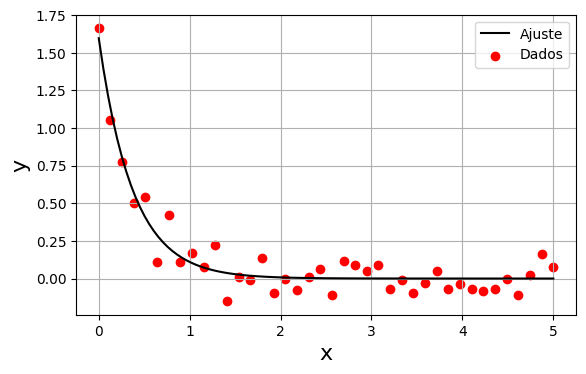

In [ ]:
#plotando o grafico da curva e sobrepondo aos dados:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

x_ajustado = np.linspace(0,5,100)
y_ajustado = teste(x_ajustado, param[0], param[1])

ax.plot(x_ajustado, y_ajustado, color='black', label='Ajuste')
ax.scatter(x, y, color='red', label='Dados')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.legend()
ax.grid()
plt.show()

### Ajuste com dados que contêm incerteza

Para plotar os dados com barras de incerteza, podemos usar o `errorbar`, também do matplotlib.

In [ ]:
# Agora com incertezas nos dados:

np.random.seed(1)

#vetor com 40 pontos de x
x = np.linspace(0,5,40)

#vetor com 40 pontos-resposta em y, mais um ruido gaussiano
y = 1.5*np.exp(-2.33*x) + 0.2*np.random.normal(loc=0, scale=0.5, size=len(x))

#vetor de incertezas
y_err = np.repeat(0.1, len(x))

#agora vamos definir a função a ser ajustada pelo curve_fit:
def teste(x, a, b):
  return a*np.exp(b*x)

#agora vamos usar o curve fit, retornando os parametros ajustados
#e matriz de covariancia dos parametros:

param, param_cov = scipy.optimize.curve_fit(f=teste,
                                            xdata=x,
                                            ydata=y,
                                            sigma=y_err)

print('Parametros ajustados:', param)
print()
print('Matriz covariancia:\n', param_cov)

Parametros ajustados: [ 1.59686457 -2.67452687]

Matriz covariancia:
 [[ 0.00693159 -0.01117485]
 [-0.01117485  0.05378234]]


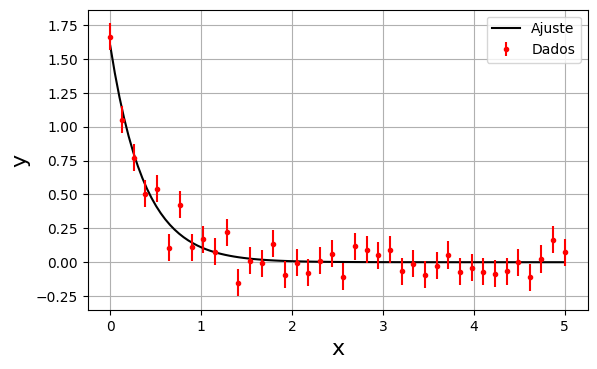

In [ ]:
#plotando o grafico da curva e sobrepondo aos dados:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

x_ajustado = np.linspace(0,5,100)
y_ajustado = teste(x_ajustado, param[0], param[1])

ax.plot(x_ajustado, y_ajustado, color='black', label='Ajuste')
ax.errorbar(x, y, yerr=y_err, color='red', label='Dados', marker='.',
            linestyle='')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.legend()
ax.grid()
plt.show()